In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from postprocess import postprocess_dir
import os
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [4]:
os.chdir('C:\\Users\\Ankit\\nse\\uoicorr')
dat = postprocess_dir('01162019')

Plots to create: 

* Typical selection profiles across block sizes, sparsity, and correlation strengths (verify functioning, not necessarily to report)
* False negative rate as a function of block size and correlation strength
* False negative rate vs. false positive rate for different sparsity, block size, and correlation strength
* R^2 performance as function of sparsity, block size, and correlation strength



In [21]:
uoil = dat.loc[dat['exp_type'] == 'UoILasso']
uoien = dat.loc[dat['exp_type'] == 'UoIElasticNet']
en = dat.loc[dat['exp_type'] == 'EN']

# Typical Selection Profiles

In [17]:
d = uoil.loc[(uoil['sparsity'] == 0.4)]

In [18]:
d.iloc[0].beta_hats.shape

(50, 60)

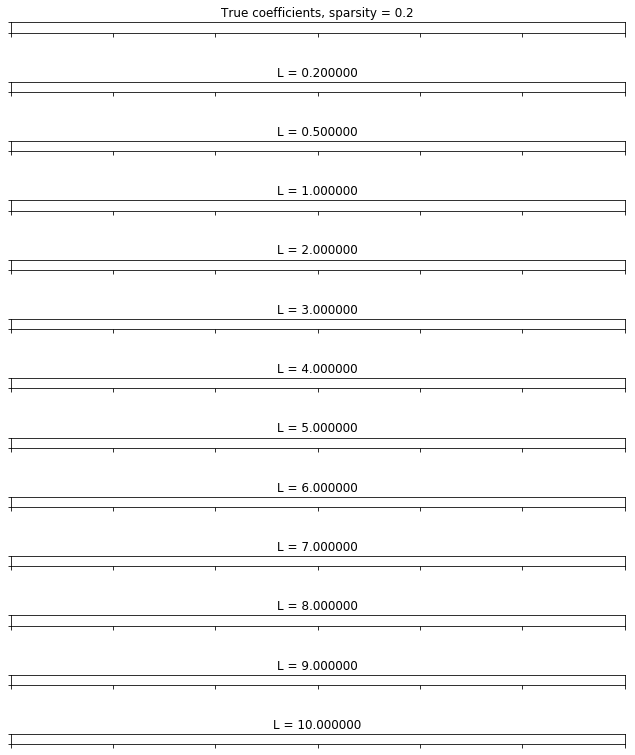

In [19]:
fig, ax = plt.subplots(13, 1, figsize=(11, 14))
# True beta
ax[0].set_aspect('equal')
ax[0].pcolor(d.iloc[0].beta[0, :, np.newaxis].T, cmap='Greys', vmin = 0, vmax = 10)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title('True coefficients, sparsity = 0.2')

for i in range(12):

    ax[i + 1].set_aspect('equal')
    ax[i + 1].pcolor(d.iloc[i].beta_hats[0, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
    ax[i + 1].set_xticklabels([])
    ax[i + 1].set_yticklabels([])
    ax[i + 1].set_title('L = %f' % d.iloc[i].cov_params['L'])


# plt.savefig('figs/01142019/uoi_lasso_selection_profile.png')

## False negative rate

In [22]:
# Make separate plots for each sparsity, plot as a function of falloff distance

# Select the relevant data:
dat_uoil = []
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.2)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.4)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.6)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.8)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 1)])

In [32]:
dat_uoil[0].iloc[0].fn.shape

(50,)

In [25]:
# Select the relevant data:
dat_uoien = []
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.2)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.4)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.6)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.8)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 1)])

In [26]:
# Select the relevant data:
dat_en = []
dat_en.append(en.loc[(en['sparsity'] == 0.2)])
dat_en.append(en.loc[(en['sparsity'] == 0.4)])
dat_en.append(en.loc[(en['sparsity'] == 0.6)])
dat_en.append(en.loc[(en['sparsity'] == 0.8)])
dat_en.append(en.loc[(en['sparsity'] == 1)])

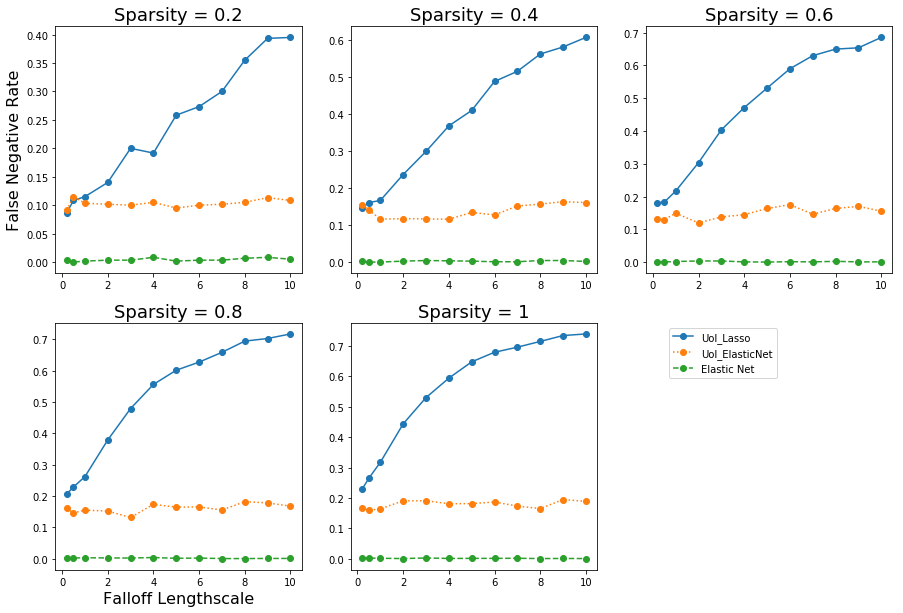

In [38]:
L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(len(dat_uoil)):
    d1 = dat_uoil[i]
    d2 = dat_uoien[i]
    d3 = dat_en[i]

    nonzero_beta = int(sparsity[i] * 60)
    
    # Organize by block_size and L
    fn_avg_uoil = [np.mean(d1.iloc[j].fn/nonzero_beta) for j in range(len(L))]
    fn_avg_uoien = [np.mean(d2.iloc[j].fn/nonzero_beta) for j in range(len(L))]
    fn_avg_en = [np.mean(d3.iloc[j].fn/nonzero_beta) for j in range(len(L))]
        
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(L, fn_avg_uoil, '-o')
    a.plot(L, fn_avg_uoien, '-o')
    a.plot(L, fn_avg_en, '-o')
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('False Negative Rate', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1.75, 1))

In [36]:
d1.iloc[0]

beta                    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
beta_hats               [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
betadist                                                          uniform
block_size                                                             60
cov_params                                                     {'L': 0.2}
cov_type                                                          falloff
est_score                                                              r2
exp_type                                                         UoILasso
fn                      [14.0, 14.0, 19.0, 11.0, 20.0, 8.0, 10.0, 17.0...
fp                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
kappa                                                                 0.3
l1_ratios                          [0.1, 0.2, 0.5, 0.75, 0.9, 0.95, 0.99]
n_alphas                                                               48
n_features                            

## False positive rate

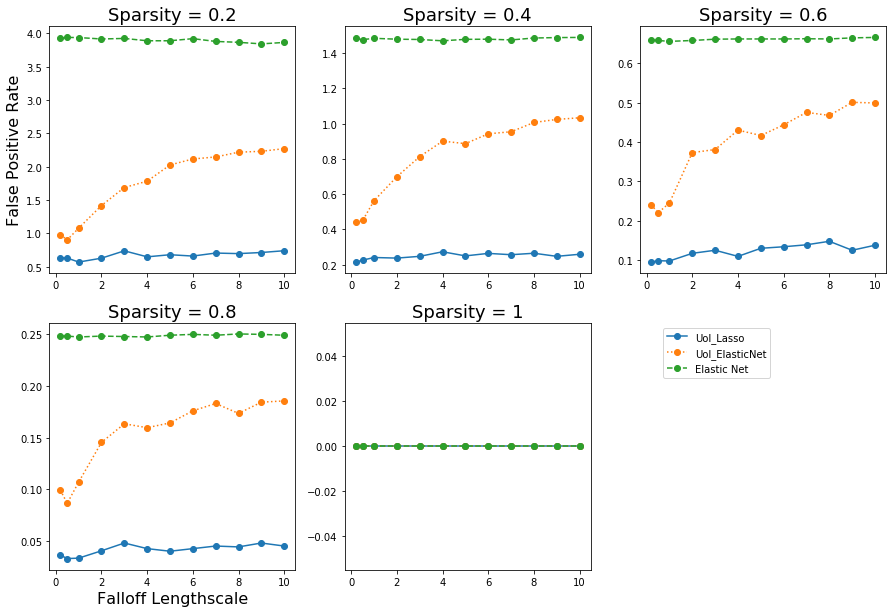

In [39]:
L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(len(dat_uoil)):
    d1 = dat_uoil[i]
    d2 = dat_uoien[i]
    d3 = dat_en[i]

    nonzero_beta = int(sparsity[i] * 60)
    
    # Organize by block_size and L
    fn_avg_uoil = [np.mean(d1.iloc[j].fp/nonzero_beta) for j in range(len(L))]
    fn_avg_uoien = [np.mean(d2.iloc[j].fp/nonzero_beta) for j in range(len(L))]
    fn_avg_en = [np.mean(d3.iloc[j].fp/nonzero_beta) for j in range(len(L))]
        
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(L, fn_avg_uoil, '-o')
    a.plot(L, fn_avg_uoien, '-o')
    a.plot(L, fn_avg_en, '-o')
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('False Positive Rate', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1.75, 1))

## R^2 as a function of sparsity, block size, and correlation strength

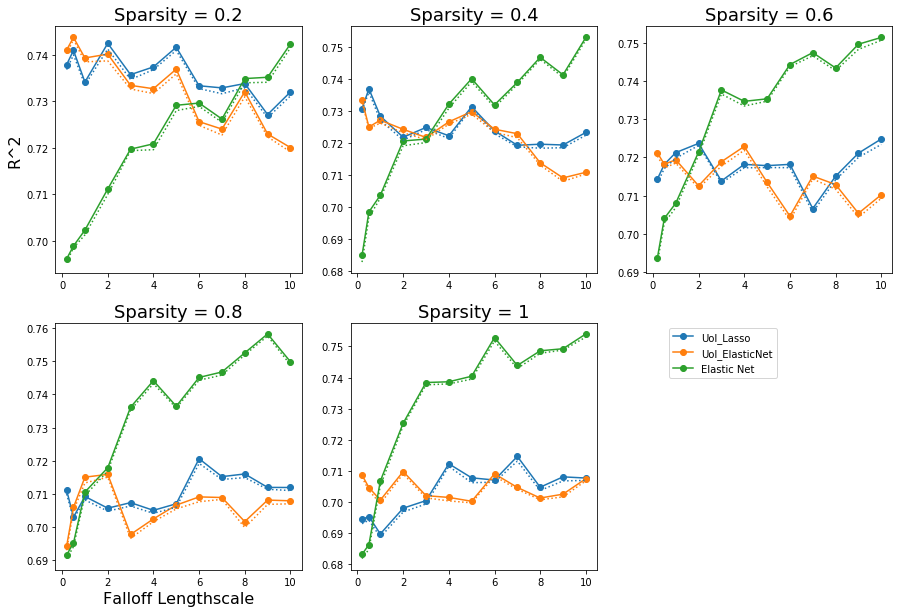

In [42]:
L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(len(dat_uoil)):
    d1 = dat_uoil[i]
    d2 = dat_uoien[i]
    d3 = dat_en[i]

    nonzero_beta = int(sparsity[i] * 60)
    
    # Organize by block_size and L
    fn_avg_uoil = [np.mean(d1.iloc[j].r2) for j in range(len(L))]
    fn_avg_uoien = [np.mean(d2.iloc[j].r2) for j in range(len(L))]
    fn_avg_en = [np.mean(d3.iloc[j].r2) for j in range(len(L))]
    
    r2_true_uoil = [np.mean(d1.iloc[j].r2_true) for j in range(len(L))]
    r2_true_uoien = [np.mean(d2.iloc[j].r2_true) for j in range(len(L))]
    r2_true_en = [np.mean(d3.iloc[j].r2_true) for j in range(len(L))]
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(L, fn_avg_uoil, '-o')
    a.plot(L, fn_avg_uoien, '-o')
    a.plot(L, fn_avg_en, '-o')
    
    a.plot(L, r2_true_uoil, ':', color = '#1f77b4')
    a.plot(L, r2_true_uoien, ':', color = '#ff7f0e')
    a.plot(L, r2_true_en, ':', color =  '#2ca02c')
    
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('R^2', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1.75, 1))

### Selection accuracy

In [1]:
L = [0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(len(dat_uoil)):
    d1 = dat_uoil[i]
    d2 = dat_uoien[i]
    d3 = dat_en[i]

    nonzero_beta = int(sparsity[i] * 60)

    fn_avg_uoil = np.array([np.mean(d1.iloc[j].fn) for j in range(len(L))])
    fn_avg_uoien = np.array([np.mean(d2.iloc[j].fn) for j in range(len(L))])
    fn_avg_en = np.array([np.mean(d3.iloc[j].fn) for j in range(len(L))])
    
    fp_avg_uoil = np.array([np.mean(d1.iloc[j].fp) for j in range(len(L))])
    fp_avg_uoien = np.array([np.mean(d2.iloc[j].fp) for j in range(len(L))])
    fp_avg_en = np.array([np.mean(d3.iloc[j].fp) for j in range(len(L))])
    
    sa_avg_uoil = 1 - np.divide((fn_avg_uoil + fp_avg_uoil), nonzero_beta)
    sa_avg_uoien = 1 - np.divide((fn_avg_uoien + fp_avg_uoien), nonzero_beta)
    sa_avg_en = 1 - np.divide((fn_avg_en + fp_avg_en), nonzero_beta)
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(L, sa_avg_uoil, '-o')
    a.plot(L, sa_avg_uoien, '-o')
    a.plot(L, sa_avg_en, '-o')
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('Selection Accuracy', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso', 'UoI_ElasticNet', 'Elastic Net'], loc = 'upper right', bbox_to_anchor=(1.75, 1))

NameError: name 'plt' is not defined

In [45]:
np.array([1, 2, 3, 45])

array([ 1,  2,  3, 45])